In [1]:
ls

README.md              ted_main.csv     Untitled1.ipynb
statistics_ass1.ipynb  transcripts.csv  Untitled.ipynb


In [2]:
!head -1 ted_main.csv

comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('ted_main.csv')
df.head(1)

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   

     event   film_date  languages  main_speaker  \
0  TED2006  1140825600         60  Ken Robinson   

                                        name  num_speaker  published_date  \
0  Ken Robinson: Do schools kill creativity?            1      1151367060   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   

                                       related_talks speaker_occupation  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...    Author/educator   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   

                         title  \
0  Do schools kill creativity?   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110

In [5]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
# Re-order the columns?

feature= ['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
        'num_speaker', 'duration', 'event', 'film_date', 'published_date', 
        'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']
df= df[feature]
df.head(1)

name                        title  \
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   

                                         description  main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   

  speaker_occupation  num_speaker  duration    event   film_date  \
0    Author/educator            1      1164  TED2006  1140825600   

   published_date  comments  \
0      1151367060      4553   

                                                tags  languages  \
0  ['children', 'creativity', 'culture', 'dance',...         60   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110

In [7]:
# converting Unix timestamp to human readable form

df.published_date = pd.to_datetime(df.published_date,unit='s')
df.film_date = pd.to_datetime(df.film_date,unit='s')
df.head(2)

name                        title  \
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
1       Al Gore: Averting the climate crisis  Averting the climate crisis   

                                         description  main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
1  With the same humor and humanity he exuded in ...       Al Gore   

  speaker_occupation  num_speaker  duration    event  film_date  \
0    Author/educator            1      1164  TED2006 2006-02-25   
1   Climate advocate            1       977  TED2006 2006-02-25   

       published_date  comments  \
0 2006-06-27 00:11:00      4553   
1 2006-06-27 00:11:00       265   

                                                tags  languages  \
0  ['children', 'creativity', 'culture', 'dance',...         60   
1  ['alternative energy', 'cars', 'climate change...         43   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520

In [8]:
# no of rows
df.index.size

2550

In [9]:
# what the 15 most viewed TED talks of all time are

top15 = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False).head(15)
top15

title       main_speaker  \
0                           Do schools kill creativity?       Ken Robinson   
1346           Your body language may shape who you are          Amy Cuddy   
677                    How great leaders inspire action        Simon Sinek   
837                          The power of vulnerability        Brené Brown   
452              10 things you didn't know about orgasm         Mary Roach   
1776         How to speak so that people want to listen    Julian Treasure   
201                                My stroke of insight  Jill Bolte Taylor   
5                                  Why we do what we do       Tony Robbins   
2114  This is what happens when you reply to spam email       James Veitch   
1416  Looks aren't everything. Believe me, I'm a model.    Cameron Russell   
500                            The puzzle of motivation           Dan Pink   
1163                            The power of introverts         Susan Cain   
1036                                 How to spot a liar       Pamela Meyer   
2109  What makes a good life? Lessons from the longe...   Robert Waldinger   
1129                    The happy secret to better work        Shawn Achor   

         views  film_date  
0     47227110 2006-02-25  
1346  43155405 2012-06-26  
677   34309432 2009-09-17  
837   31168150 2010-06-06  
452   22270883 2009-02-06  
1776  21594632 2013-06-10  
201   21190883 2008-02-27  
5     20685401 2006-02-02  
2114  20475972 2015-12-08  
1416  19787465 2012-10-27  
500   18830983 2009-07-24  
1163  17629275 2012-02-28  
1036  16861578 2011-07-13  
2109  16601927 2015-11-14  
1129  16209727 2011-05-11

In [46]:
# Bar plot top 15 talks based on views

#top15.plot(kind='bar', x='title', y='views')
x = plt.figure(figsize=(8,5))
x = sns.barplot(x='title', y='views', data= top15)
x =plt.xticks(rotation=90)
x = plt.title('Top 10 ted talks vs views')

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

count    2379.000000
mean      139.722152
std       105.684360
min         2.000000
25%        60.000000
50%       109.000000
75%       194.000000
max       499.000000
Name: comments, dtype: float64

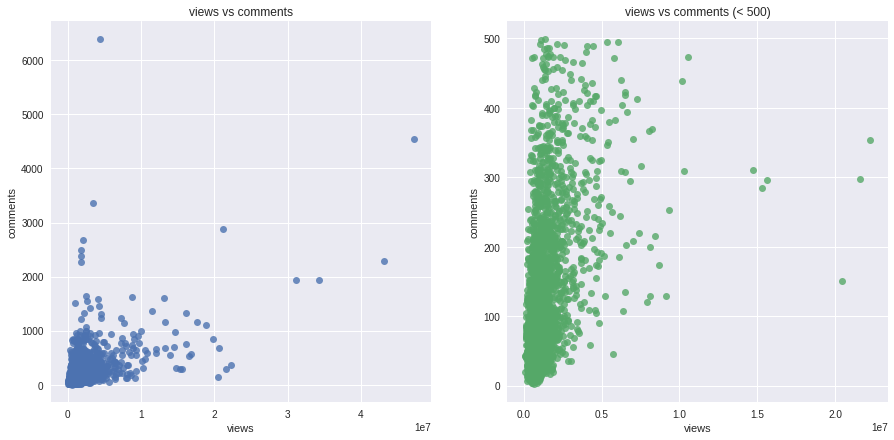

In [51]:
# statistics of Comments?

df.comments.describe()
df[df.comments < 500 ].comments.describe()
f, axes = plt.subplots(1, 2, figsize=(15, 7))
x = sns.regplot(x='views', y='comments', data= df, ax=axes[0], fit_reg=False)
axes[0].title.set_text('views vs comments')
x = sns.regplot(x='views', y='comments', data= df[df.comments < 500 ], ax=axes[1], fit_reg=False)
axes[1].title.set_text('views vs comments (< 500)')

In [12]:
# correlation betwwen views and comments?

df[['views', 'comments']].corr()

views  comments
views     1.000000  0.530939
comments  0.530939  1.000000

In [13]:
# check the number of views and comments on the 10 most commented TED Talks of all time.

df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

title       main_speaker     views  \
96                            Militant atheism    Richard Dawkins   4374792   
0                  Do schools kill creativity?       Ken Robinson  47227110   
644         Science can answer moral questions         Sam Harris   3433437   
201                       My stroke of insight  Jill Bolte Taylor  21190883   
1787         How do you explain consciousness?     David Chalmers   2162764   
954               Taking imagination seriously     Janet Echelman   1832930   
840                       On reading the Koran    Lesley Hazleton   1847256   
1346  Your body language may shape who you are          Amy Cuddy  43155405   
661               The danger of science denial    Michael Specter   1838628   
677           How great leaders inspire action        Simon Sinek  34309432   

      comments  
96        6404  
0         4553  
644       3356  
201       2877  
1787      2673  
954       2492  
840       2374  
1346      2290  
661       2272  
677       1930

In [14]:
# Which talks tend to attract the largest amount of discussion?
df1 = df[['title', 'main_speaker','views', 'comments']]
df1.is_copy = False
df1['discussion_quotient'] = df1['comments'] / df1['views'] 
df1.sort_values('discussion_quotient', ascending= False).head(10)

title           main_speaker    views  \
744        The case for same-sex marriage        Diane J. Savino   292395   
803                E-voting without fraud          David Bismark   543551   
96                       Militant atheism        Richard Dawkins  4374792   
694   Inside a school for suicide bombers  Sharmeen Obaid-Chinoy  1057238   
954          Taking imagination seriously         Janet Echelman  1832930   
840                  On reading the Koran        Lesley Hazleton  1847256   
876          Curating humanity's heritage      Elizabeth Lindsey   439180   
1787    How do you explain consciousness?         David Chalmers  2162764   
661          The danger of science denial        Michael Specter  1838628   
561             Dance to change the world       Mallika Sarabhai   481834   

      comments  discussion_quotient  
744        649             0.002220  
803        834             0.001534  
96        6404             0.001464  
694       1502             0.001421  
954       2492             0.001360  
840       2374             0.001285  
876        555             0.001264  
1787      2673             0.001236  
661       2272             0.001236  
561        595             0.001235

In [53]:
# Analysing TED Talks by the month ?

mon= {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
         7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec' }
mon1= ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
mon_type = pd.Categorical(mon1, ordered=True, categories= mon1)
df['month']= df.film_date.dt.month.replace(mon)
df['month']= pd.Categorical(df.month, ordered=True, categories= mon1)
x = plt.figure(figsize=(8,5))
x = df.month.value_counts(sort=False)
x= sns.barplot(x.index, x)
x= plt.ylabel('talks');
x= plt.title('months vs talks')

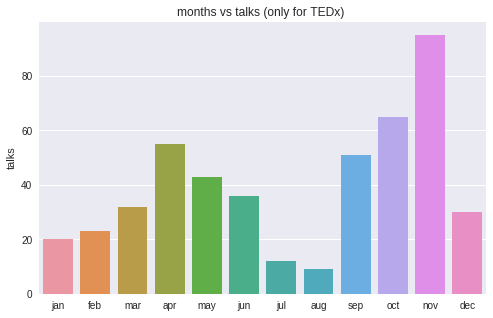

In [57]:
#  Analysing only TEDx Talks by the month ?
x= plt.figure(figsize=(8,5))
x = df[df.event.str.contains('TEDx')].month.value_counts(sort=False)
x= sns.barplot(x.index, x)
x = plt.ylabel('talks')
x= plt.title('months vs talks (only for TEDx) ')

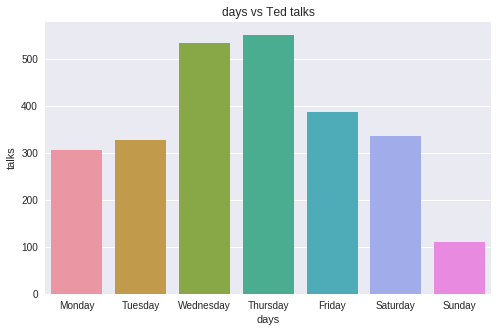

In [59]:
# the most popular days for conducting TED and TEDx conferences ?

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
x = plt.figure(figsize=(8,5))
x= df.groupby(df.film_date.dt.weekday_name).size().reindex(week)
x= sns.barplot(x.index, x)
x= plt.xlabel('days')
x= plt.ylabel('talks')
x= plt.title('days vs Ted talks')

count    2550.000000
mean     2011.466275
std         3.727823
min      1972.000000
25%      2009.000000
50%      2012.000000
75%      2014.000000
max      2017.000000
Name: film_date, dtype: float64

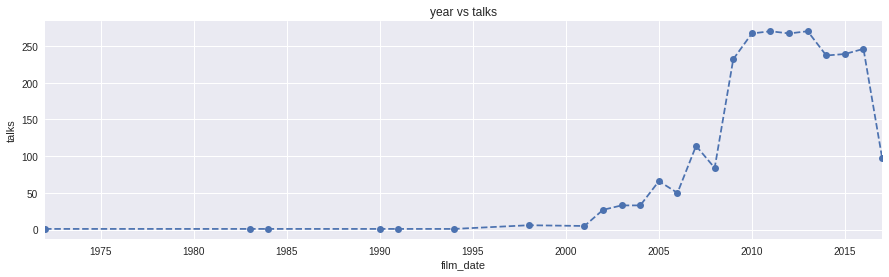

In [62]:
# the number of TED talks through the years ?

x= df.groupby(df.film_date.dt.year).size().plot(style='o--', figsize=(15,4))
df.film_date.dt.year.describe()
x= plt.ylabel('talks')
x= plt.title('year vs talks')

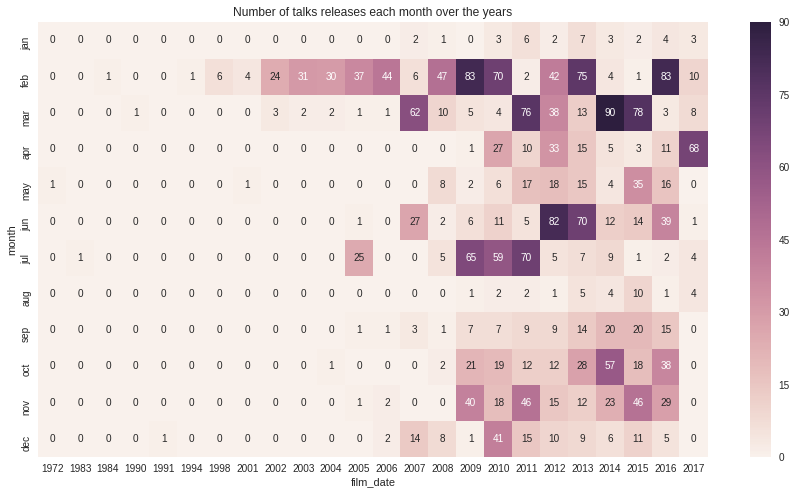

In [63]:
# no of talks for each year month wise ?

df1 = df.groupby([df.film_date.dt.year,'month'])['title'].count().unstack(level=0).fillna(0)#.stack().reset_index().plot(kind='scatter', x= 'film_date', y='month', c='title', s=50 )
x= plt.figure(figsize=(15,8))
x= sns.heatmap(df1, annot=True)
x = plt.title('Number of talks releases each month over the years')
#df.groupby([df.film_date.dt.year,'month'])['title'].count().reset_index().plot(kind='scatter', x= 'film_date', y='month', c='title', s=50 )
#plt.show()

In [20]:
# who are the most popular TED Speakers?

df.groupby('main_speaker').size().sort_values(ascending=False).head(10)

main_speaker
Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Jacqueline Novogratz    5
Julian Treasure         5
Clay Shirky             5
Dan Ariely              5
Nicholas Negroponte     5
Bill Gates              5
dtype: int64

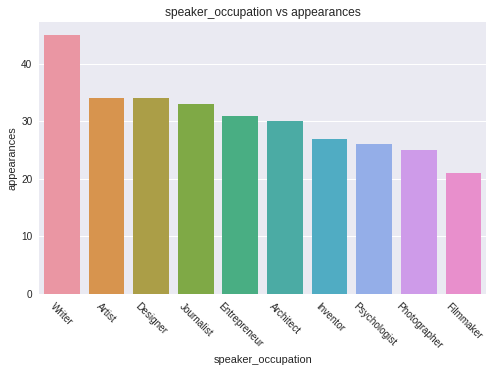

In [64]:
# Which occupation should you choose if you want to become a TED Speaker?
x= plt.figure(figsize=(8,5))
x=df.groupby('speaker_occupation').size().sort_values(ascending=False).head(10)
x = sns.barplot(x.index, x)
x =plt.ylabel('appearances')
x= plt.xticks(rotation=-45)
x = plt.title('speaker_occupation vs appearances')

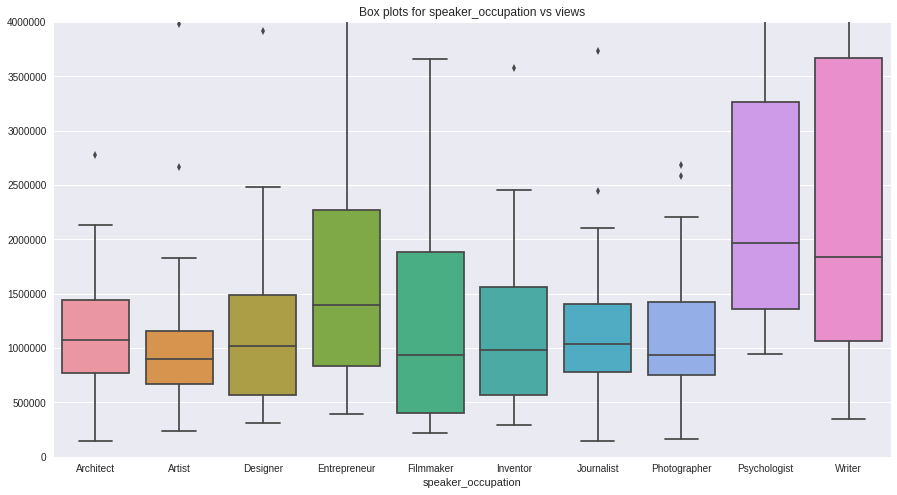

In [66]:
# Do some professions tend to attract a larger number of viewers? 

# Do answer this question let us visualise the relationship between the top 10 most popular professions and
# the views thet garnered in the form of a box plot.


top10prof =df.groupby('speaker_occupation').size().sort_values(ascending=False).head(10)
x = df.groupby('speaker_occupation').apply(lambda x: x.views)
x = x.unstack(level=1)
x = x[x.index.isin(top10prof.index)].stack().unstack(level=0)
y= plt.figure(figsize=(15,8))
x=sns.boxplot(data=x)
x =plt.ylim(0,0.4e7)
x= plt.title('Box plots for speaker_occupation vs views')

In [23]:
# the number of talks which have had more than one speaker.

df.num_speaker.value_counts()


1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [24]:
# get details about talk, which is shared by more number of speakers?

df[df.num_speaker == 5][['title', 'description', 'main_speaker', 'event']]

title  \
2507  A dance to honor Mother Earth   

                                            description  \
2507  Movement artists Jon Boogz and Lil Buck debut ...   

                main_speaker    event  
2507  Jon Boogz and Lil Buck  TED2017

In [25]:
#Which TED Events tend to hold the most number of TED.com upload worthy events?

df.event.value_counts().nlargest(10)

TED2014           84
TED2009           83
TED2016           77
TED2013           77
TED2015           75
TEDGlobal 2012    70
TED2011           70
TEDGlobal 2011    68
TED2007           68
TED2010           68
Name: event, dtype: int64

In [26]:
#descriptive statistics about languages at TED

df.languages.describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [27]:
# the talk which has max no of languages
df[df.languages == 72]

name                          title  \
973  Matt Cutts: Try something new for 30 days  Try something new for 30 days   

                                           description main_speaker  \
973  Is there something you've always meant to do, ...   Matt Cutts   

    speaker_occupation  num_speaker  duration    event  film_date  \
973       Technologist            1       207  TED2011 2011-03-03   

         published_date  comments                    tags  languages  \
973 2011-07-01 15:14:00       736  ['culture', 'success']         72   

                                               ratings  \
973  [{'id': 10, 'name': 'Inspiring', 'count': 6171...   

                                         related_talks  \
973  [{'id': 947, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url    views month  
973  https://www.ted.com/talks/matt_cutts_try_somet...  8838874   mar

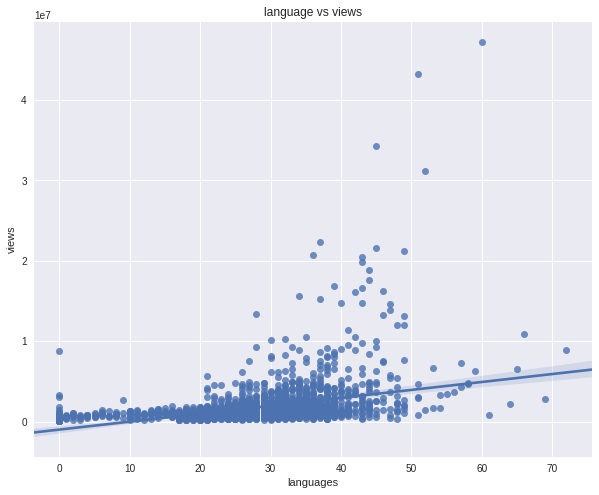

In [67]:
# scatter plot between top languages and views
x = plt.figure(figsize=(10,8))
x = sns.regplot(x='languages', y='views', data=df)
x = plt.title('language vs views')

In [29]:
# correlation between languages and views

df[['languages', 'views']].corr()

languages     views
languages   1.000000  0.377623
views       0.377623  1.000000

In [30]:
# split the related_tags list into separate rows.
import ast
df.tags[0]
pd.Series(ast.literal_eval(df.tags[0]))

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

0      children
1    creativity
2       culture
3         dance
4     education
5     parenting
6      teaching
dtype: object

In [70]:
# check the most popular themes?

tag = df.tags.apply(lambda x: pd.Series(ast.literal_eval(x))).stack().reset_index(level=1).rename(columns={0: 'theme'})
df1 = pd.merge(df,tag,left_index=True, right_index=True)
df1['theme'].value_counts().nlargest(10)

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: theme, dtype: int64

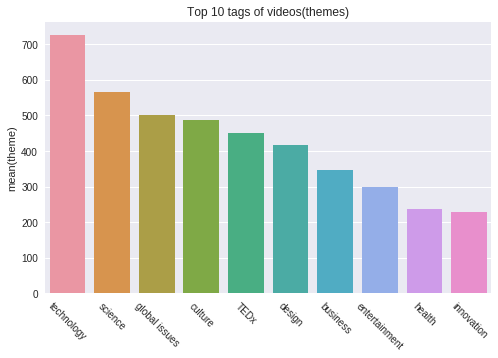

In [72]:
# bar plot of top 10 themes?

top_10_themes = df1['theme'].value_counts().nlargest(10)
x= plt.figure(figsize=(8,5))
x = sns.barplot(top_10_themes.index, top_10_themes)
x= plt.xticks(rotation=-45)
x =plt.title('Top 10 tags of videos(themes)')

In [33]:
# We will only be considering the top 7 themes, excluding TEDx and talks after 2009, 
# the year when the number of TED Talks really peaked?

df2= df1[np.all([df1.film_date.dt.year > 2008 , ~df1.event.str.contains('TEDx')],axis=0)]
df3 = df2.groupby(df2.film_date.dt.year).theme.value_counts().reset_index(level=0)
df4 = df3[df3.index.isin(top_10_themes.index)]
x =pd.pivot_table(df4, values='theme', index='film_date', columns=df4.index)
x1 =x.plot.bar(stacked=True, figsize=(10,8))

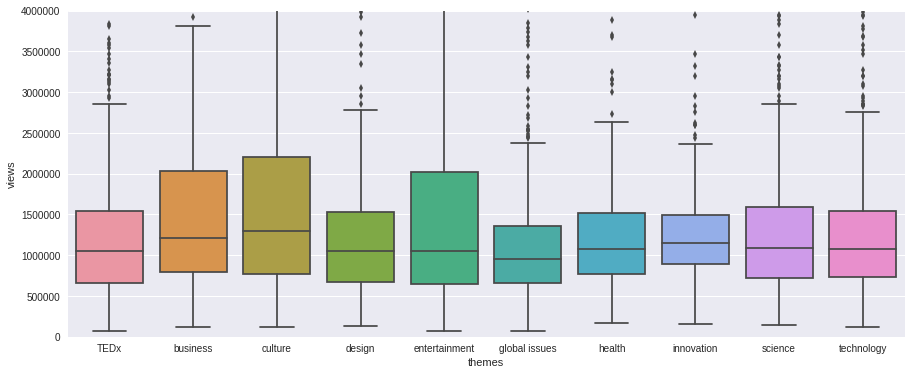

In [34]:
# box plot for top 10 themes and views?

df2 = df1.groupby('theme').apply(lambda x: x.views).unstack()
x=df2[df2.index.isin(top_10_themes.index)].stack().unstack(level=0)
y =plt.figure(figsize=(15,6))
x =sns.boxplot(data= x)#.plot.box(figsize=(15, 6),
y=plt.ylim(0, 0.4e7)
x =plt.ylabel('views')
x = plt.xlabel('themes')
plt.show()

In [35]:
# add funny, jawdrop, beautiful and confusing columns? 

df2 = df.ratings.apply(lambda x: ast.literal_eval(x))
funny = df2.apply(lambda x: pd.DataFrame(x).set_index('name')).apply(lambda x: x.loc['Funny', 'count'])
jawdrop = df2.apply(lambda x: pd.DataFrame(x).set_index('name')).apply(lambda x: x.loc['Jaw-dropping', 'count'])
beautiful = df2.apply(lambda x: pd.DataFrame(x).set_index('name')).apply(lambda x: x.loc['Beautiful', 'count'])
confusing = df2.apply(lambda x: pd.DataFrame(x).set_index('name')).apply(lambda x: x.loc['Confusing', 'count'])

df['funny']= funny
df['jawdrop'] = jawdrop
df['beautiful'] = beautiful
df['confusing'] = confusing

In [36]:
# check for null value?

df[['title', 'funny', 'jawdrop', 'beautiful', 'confusing']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 5 columns):
title        2550 non-null object
funny        2550 non-null int64
jawdrop      2550 non-null int64
beautiful    2550 non-null int64
confusing    2550 non-null int64
dtypes: int64(4), object(1)
memory usage: 99.7+ KB


In [37]:
df[['title', 'funny', 'jawdrop', 'beautiful', 'confusing']].head(5)

title  funny  jawdrop  beautiful  confusing
0      Do schools kill creativity?  19645     4439       4573        242
1      Averting the climate crisis    544      116         58         62
2                 Simplicity sells    964       54         60         27
3              Greening the ghetto     59      230        291         32
4  The best stats you've ever seen   1390     3736        942         72

In [38]:
# Funniest Talks of all time?

df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False).head(5)

#df[df.title == 'The power of vulnerability']
#df2.loc[837]

title        main_speaker  \
0                           Do schools kill creativity?        Ken Robinson   
2114  This is what happens when you reply to spam email        James Veitch   
2161         Inside the mind of a master procrastinator           Tim Urban   
1129                    The happy secret to better work         Shawn Achor   
675   Lies, damned lies and statistics (about TEDTalks)  Sebastian Wernicke   

         views      published_date  funny  
0     47227110 2006-06-27 00:11:00  19645  
2114  20475972 2016-01-08 16:03:40   7731  
2161  14745406 2016-03-15 18:36:59   7445  
1129  16209727 2012-02-01 16:09:38   7315  
675    2212944 2010-04-30 08:59:00   5552

In [39]:
# Most Beautiful Talks of all time?

df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False).head(5)

title              main_speaker  \
201                         My stroke of insight         Jill Bolte Taylor   
837                   The power of vulnerability               Brené Brown   
972                   Building a park in the sky            Robert Hammond   
246  The transformative power of classical music           Benjamin Zander   
530                 The danger of a single story  Chimamanda Ngozi Adichie   

        views      published_date  beautiful  
201  21190883 2008-03-12 01:10:00       9437  
837  31168150 2010-12-23 14:45:00       7942  
972    704205 2011-06-30 14:54:00       6685  
246   9315483 2008-06-25 01:00:00       5967  
530  13298341 2009-10-07 01:00:00       5607